In [2]:
import torch, detectron2
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

torch:  2.4 ; cuda:  cu124
detectron2: 0.6


In [12]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random, matplotlib.pyplot as plt


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Helper function
def cv2_imshow(img):
    """
    Displays an image in a Jupyter notebook using matplotlib.

    Args:
        image_path (str): Path to the image file.
    """

    # Check if the image was successfully loaded
    if img is None:
        print(f"Error: Image at {image_path} not found or failed to load.")
        return
    
    # Convert the image from BGR to RGB for correct display with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off the axis labels
    plt.show()

# Standard Detectron2 Run

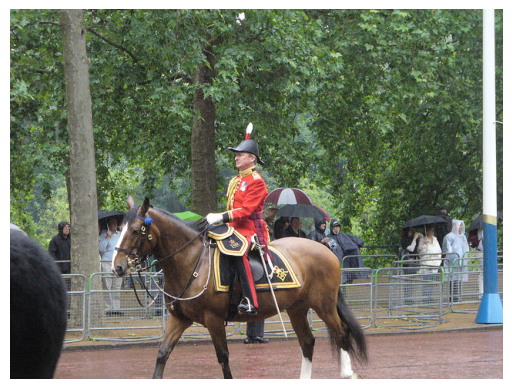

In [13]:
# Download image from coco
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [14]:
# Then, we create a detectron2 config and a detectron2 DefaultPredictor to run inference on this image.
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[09/20 17:25:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 195MB/s]                                                                            
/taiga/conda/envs/clowder2-extractors/lib/python3.10/site-packages/detectron2/layers/wrappers.py:46: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  return is_compiling()
/taiga/conda/envs/clowder2-extractors/lib/python3.10/site-packages/detectron2/layers/wrappers.py:46: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  return is_compiling()
/taiga/conda/envs/clowder2-extractors/lib/python3.10/site-packages/detectron2/layers/wrappers.py:46: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  return is_compiling()
/taiga/conda/envs/clowder2-extractors/lib/python3.10/site-packages/detectron2/layers/wrappers.py:46: FutureWarning: `torch._dynamo.external_utils.is_co

In [15]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24],
       device='cuda:0')
Boxes(tensor([[126.5964, 244.9039, 459.8270, 480.0000],
        [251.1056, 157.8039, 338.9741, 413.6265],
        [114.8514, 268.6902, 148.2415, 398.8185],
        [  0.8256, 281.0320,  78.5998, 478.4251],
        [ 49.3939, 274.1213,  80.1531, 342.9865],
        [561.2258, 271.5833, 596.2775, 385.2551],
        [385.9053, 270.3107, 413.7130, 304.0385],
        [515.9225, 278.3662, 562.2765, 389.3755],
        [335.2367, 251.9167, 414.7500, 275.9355],
        [350.9462, 269.2095, 386.0934, 297.9062],
        [331.6263, 230.9989, 393.2781, 257.2007],
        [510.7303, 263.2685, 570.9894, 295.9459],
        [409.0925, 271.8651, 460.5599, 356.8696],
        [506.8876, 283.3291, 529.9478, 324.0190],
        [594.5665, 283.4849, 609.0561, 311.4122]], device='cuda:0'))


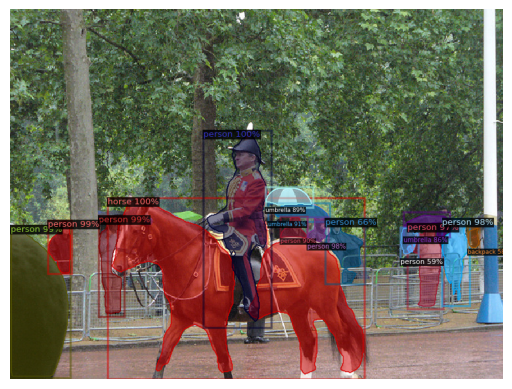

In [16]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])